In [1]:
%pwd

'C:\\Users\\Hung\\Desktop\\Học\\Codegym\\Codegym\\2. Python for DA\\1. Khai giảng'

In [2]:
# sử dụng thư viện pandas để làm việc với dữ liệu dạng bảng
import pandas as pd
# đọc dữ liệu, file dữ liệu thường có encoding = 'UTF-8' hoặc 'ISO-8859-1'
table = pd.read_csv('C:\\Users\\Hung\\Desktop\\Học\\Codegym\\Codegym\\2. Python for DA\\1. Khai giảng\subset-covid-data.csv', encoding = "ISO-8859-1")
# hiển thị 5 dòng dữ liệu đầu tiên
table.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


In [3]:
# Số lượng dòng và cột của dữ liệu
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [4]:
# Tìm hiểu xem dữ liệu được thống kê cho những ngày nào
table.date.value_counts()

2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: date, dtype: int64

In [5]:
# lọc dữ liệu nhiễu:
cleaned_table = table[table.date == "2020-04-12"]

In [6]:
# Kiểm tra trung bình và trung vị của số ca mắc mới trong ngày 04-12-2020
print("Số ca mắc trung bình trong ngày 04-12-2020 là " + str(cleaned_table.cases.mean()))
print("Trung vị của số ca mắc mới trong ngày 04-12-2020 là " + str(cleaned_table.cases.median()))

Số ca mắc trung bình trong ngày 04-12-2020 là 376.8186274509804
Trung vị của số ca mắc mới trong ngày 04-12-2020 là 11.5


Text(0, 0.5, 'Số lượng quốc gia')

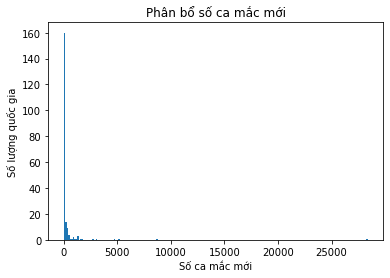

In [7]:
# Vẽ biểu đồ thể hiện phân bổ số ca mắc mới trong ngày 04-12-2020
import matplotlib.pyplot as plt
plt.hist(cleaned_table.cases, bins = 200)
plt.title("Phân bổ số ca mắc mới")
plt.xlabel("Số ca mắc mới")
plt.ylabel("Số lượng quốc gia")


In [8]:
print("Tổng số ca nhiễm và số ca của các châu lục")
cleaned_table.groupby("continent")["cases", "deaths"].sum()

Tổng số ca nhiễm và số ca của các châu lục


C:\Users\Hung\AppData\Local\Temp\ipykernel_23316\525408523.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cleaned_table.groupby("continent")["cases", "deaths"].sum()


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,29591,2966
Oceania,68,4


In [9]:
print("5 quốc gia có số ca nhiễm mới trong ngày 04-12-2020 cao nhất")
top_5_cases = cleaned_table.sort_values("cases", ascending = False)
top_5_cases.head()

5 quốc gia có số ca nhiễm mới trong ngày 04-12-2020 cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0


In [10]:
print("Top 5 quốc gia có số ca tử vong cao nhất trong ngày 04-12-2020")
top_5_deaths = cleaned_table.sort_values("deaths", ascending = False)
top_5_deaths.head()

Top 5 quốc gia có số ca tử vong cao nhất trong ngày 04-12-2020


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
18,Belgium,Europe,2020-04-12,12,4,2020,1351,327,BEL,11422068.0
